# Evaluation formative #3

Utiliser ce notebook et répondre aux questions du formulaire
* [https://forms.gle/ty6EQ9VCoF1YhJNEA](https://forms.gle/ty6EQ9VCoF1YhJNEA)
* Durée: 40 minutes

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

### 1 - Simulation de données

In [2]:
from sklearn.datasets import make_circles

In [3]:
N = 100
X, y = make_circles(n_samples=10*N, shuffle=True, noise=0.1, random_state=2021)

In [7]:
type(N)
type(y)

numpy.ndarray

#### Affichage du jeu de données simulé

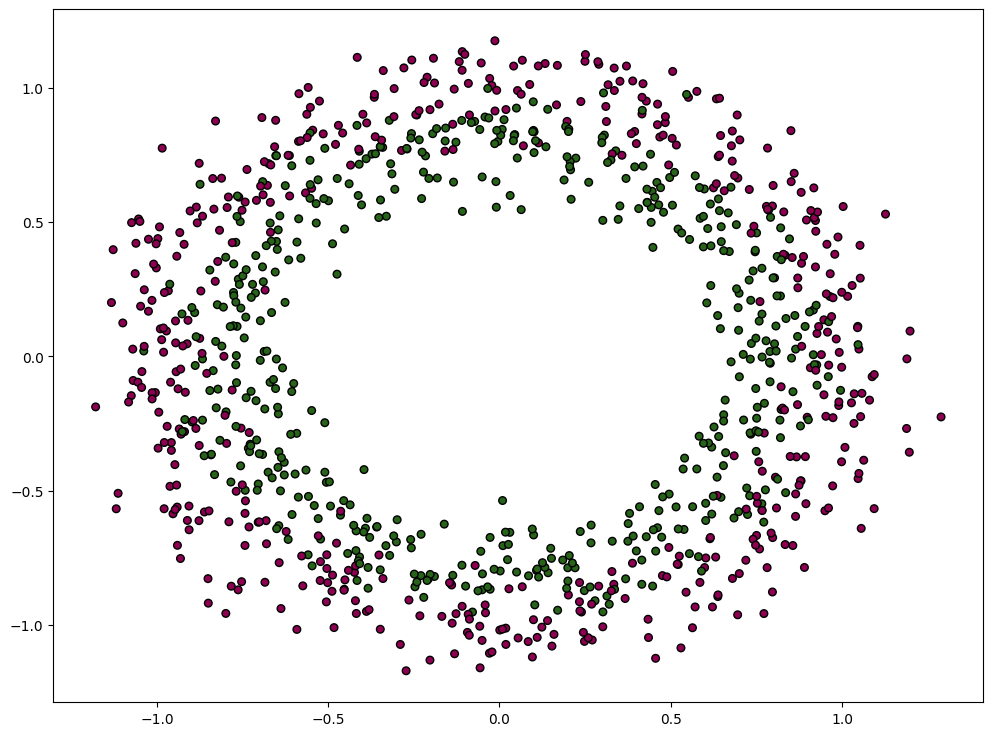

In [8]:
import matplotlib.pyplot as plt

fig = plt.figure(1, figsize=(12, 9))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='PiYG', edgecolor='k', s=30)
plt.show()

### 2 - Préparation de données

<strong>
Séparation des données en train et validation
</strong>

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.6, random_state=2021)

In [27]:
import numpy as np
import pandas as pd
dfXtrain = pd.DataFrame(X_train)
dfY = pd.DataFrame(y)

In [22]:
y_val

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,

In [24]:
dfXtrain.describe()

,0,1
count,600.000000,600.000000
mean,-0.028058,0.006536
std,0.650658,0.648482
min,-1.179239,-1.171829
25%,-0.642497,-0.609547
50%,-0.054003,0.017761
75%,0.587765,0.609858
max,1.196592,1.135962


In [29]:
dfY[0].unique()

array([0, 1])

In [30]:
dfY.value_counts()

0    500
1    500
dtype: int64

### 3 - Modèle de référence (baseline)

In [60]:
### DummyClassifier :  utiliser most_frequent
from sklearn.dummy import DummyClassifier
baseline_clf = DummyClassifier(strategy="most_frequent")
baseline_clf.fit(X_train, y_train)
print(baseline_clf.score(X_train, y_train))
print(baseline_clf.score(X_val, y_val))

0.51
0.485


In [ ]:
# Ici coder le modèle baseline
#y_baseline = y.mean()

### 4 - Régression logistique, ordre 1

In [67]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X1_scaled = scaler.fit_transform(X_train)

# Ici coder le modèle de type régression logistique
from sklearn.linear_model import LogisticRegression
clf1 = LogisticRegression(penalty='l2', random_state=2023, solver='sag')
clf1.fit(X1_scaled, y_train)

LogisticRegression(random_state=2023, solver='sag')

In [64]:
# Compléter le code ci-dessous ~ 1 ligne
### score: predicts and evalute. Don't need to call predict
clf1.score(X1_scaled, y_train)

0.475

In [65]:
# Compléter le code ci-dessous ~ 2-3 lignes
X1_test_scaled = scaler.transform(X_val)
clf1.score(X1_test_scaled, y_val)

0.4675

In [53]:
from sklearn.linear_model import Lasso
ls = Lasso(alpha=0.01, normalize=True)
ls.fit(X1_scaled, y_train)
#ls.score(X1_scaled, y_train)


/home/hadoop/.local/lib/python3.11/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


Lasso(alpha=0.01, normalize=True)

In [ ]:
from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())
model.fit(X1_scaled, y_train)
model.score()

In [56]:
ls.score(X1_test_scaled, y_val)

-0.002502252026824081

In [57]:
print(ls.coef_)

[-0. -0.]


In [33]:
sns.set(rc={'figure.figsize':(16,6)})
plot_classifier(X_train, y_train, clf1, scaler, order=1)

NameError: name 'sns' is not defined

### Fin du Quiz